# Importing Libraries

In [29]:
import pandas as pd
DISPLAY_PRECISION = 4
pd.set_option("display.precision", DISPLAY_PRECISION)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from tqdm import tqdm
print('Libraries Imported')    

Libraries Imported


# Data Loading

In [2]:
data = load_breast_cancer()
print(data.keys())
print("-"*50)
print(data.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
--------------------------------------------------
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean o

# Explorative Data Analysis

In [3]:
classes = data.target_names.tolist()
target = data.target.tolist()
features = data.feature_names.tolist()
print(features)
print("There are "+str(len(classes))+" target classes:")
print("classes", classes)
print("-"*50)
print("Target class distribution from a total of %d target values:" % len(target))
print(pd.Series(target).value_counts())
print("-"*50)

df = pd.DataFrame(data.data[:,:], columns=features)
print("Describe dataframe, first 5:")
print(df.iloc[:,:5].describe().to_string())

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
There are 2 target classes:
classes ['malignant', 'benign']
--------------------------------------------------
Target class distribution from a total of 569 target values:
1    357
0    212
dtype: int64
--------------------------------------------------
Describe dataframe, first 5:
       mean radius  mean texture  mean perimeter  mean area  mean smoothness
count     569.0000      569.0000         569.000   569.0000     

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,20.57,17.77,132.90,1326.0,0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890
2,19.69,21.25,130.00,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876
3,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
4,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768


### Output json for testing

In [5]:
import json
row = df.to_dict('index')[0]
values = [k for k in row.values()]
keys = row.keys()
out = dict()
for index,key in enumerate(keys):
    out[key.replace(" ", "_")]=values[index]
json.dumps(out)

'{"mean_radius": 17.99, "mean_texture": 10.38, "mean_perimeter": 122.8, "mean_area": 1001.0, "mean_smoothness": 0.1184, "mean_compactness": 0.2776, "mean_concavity": 0.3001, "mean_concave_points": 0.1471, "mean_symmetry": 0.2419, "mean_fractal_dimension": 0.07871, "radius_error": 1.095, "texture_error": 0.9053, "perimeter_error": 8.589, "area_error": 153.4, "smoothness_error": 0.006399, "compactness_error": 0.04904, "concavity_error": 0.05373, "concave_points_error": 0.01587, "symmetry_error": 0.03003, "fractal_dimension_error": 0.006193, "worst_radius": 25.38, "worst_texture": 17.33, "worst_perimeter": 184.6, "worst_area": 2019.0, "worst_smoothness": 0.1622, "worst_compactness": 0.6656, "worst_concavity": 0.7119, "worst_concave_points": 0.2654, "worst_symmetry": 0.4601, "worst_fractal_dimension": 0.1189}'

In [6]:
df.isnull().sum() / df.shape[0] #checking null percentage

mean radius                0.0
mean texture               0.0
mean perimeter             0.0
mean area                  0.0
mean smoothness            0.0
mean compactness           0.0
mean concavity             0.0
mean concave points        0.0
mean symmetry              0.0
mean fractal dimension     0.0
radius error               0.0
texture error              0.0
perimeter error            0.0
area error                 0.0
smoothness error           0.0
compactness error          0.0
concavity error            0.0
concave points error       0.0
symmetry error             0.0
fractal dimension error    0.0
worst radius               0.0
worst texture              0.0
worst perimeter            0.0
worst area                 0.0
worst smoothness           0.0
worst compactness          0.0
worst concavity            0.0
worst concave points       0.0
worst symmetry             0.0
worst fractal dimension    0.0
dtype: float64

#### check the data shape and basic info

In [7]:
df.shape

(569, 30)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
# feature names as a list
col = df.columns       # .columns gives columns names in data 
print(col)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


#### Assuming 0=Malignant and 1=Benign

In [13]:
# y is our target and x contains our features
y = pd.Series(target)                          # 1 or 0 
X = df
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,20.57,17.77,132.90,1326.0,0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890
2,19.69,21.25,130.00,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876
3,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
4,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768


### Describing to know more about variables

In [14]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.0000,569.0000,569.000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,...,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000
mean,14.1273,19.2896,91.969,654.8891,0.0964,0.1043,0.0888,0.0489,0.1812,0.0628,...,16.2692,25.6772,107.2612,880.5831,0.1324,0.2543,0.2722,0.1146,0.2901,0.0839
std,3.5240,4.3010,24.299,351.9141,0.0141,0.0528,0.0797,0.0388,0.0274,0.0071,...,4.8332,6.1463,33.6025,569.3570,0.0228,0.1573,0.2086,0.0657,0.0619,0.0181
min,6.9810,9.7100,43.790,143.5000,0.0526,0.0194,0.0000,0.0000,0.1060,0.0500,...,7.9300,12.0200,50.4100,185.2000,0.0712,0.0273,0.0000,0.0000,0.1565,0.0550
25%,11.7000,16.1700,75.170,420.3000,0.0864,0.0649,0.0296,0.0203,0.1619,0.0577,...,13.0100,21.0800,84.1100,515.3000,0.1166,0.1472,0.1145,0.0649,0.2504,0.0715
50%,13.3700,18.8400,86.240,551.1000,0.0959,0.0926,0.0615,0.0335,0.1792,0.0615,...,14.9700,25.4100,97.6600,686.5000,0.1313,0.2119,0.2267,0.0999,0.2822,0.0800
75%,15.7800,21.8000,104.100,782.7000,0.1053,0.1304,0.1307,0.0740,0.1957,0.0661,...,18.7900,29.7200,125.4000,1084.0000,0.1460,0.3391,0.3829,0.1614,0.3179,0.0921
max,28.1100,39.2800,188.500,2501.0000,0.1634,0.3454,0.4268,0.2012,0.3040,0.0974,...,36.0400,49.5400,251.2000,4254.0000,0.2226,1.0580,1.2520,0.2910,0.6638,0.2075


### Spliting the data in to train test splits

In [15]:
# split into 70:30 ratio sized train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("X_train.shape, y_train.shape", X_train.shape, y_train.shape)
print("X_test.shape, y_test.shape", X_test.shape, y_test.shape)

X_train.shape, y_train.shape (398, 30) (398,)
X_test.shape, y_test.shape (171, 30) (171,)


# Data Visualization

Number of Malignant :  212
Number of Benign:  357


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


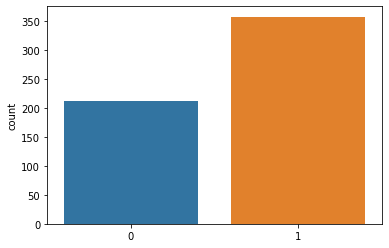

In [16]:
ax = sns.countplot(y,label="Count")       # Benign = 357, Malignant = 212
Benign, Malignant = y.value_counts()
print('Number of Malignant : ',Malignant)
print('Number of Benign: ',Benign)

Function correlation_matrix: X.shape, y.shape, yX.shape: (398, 30) (398,) (398, 31)



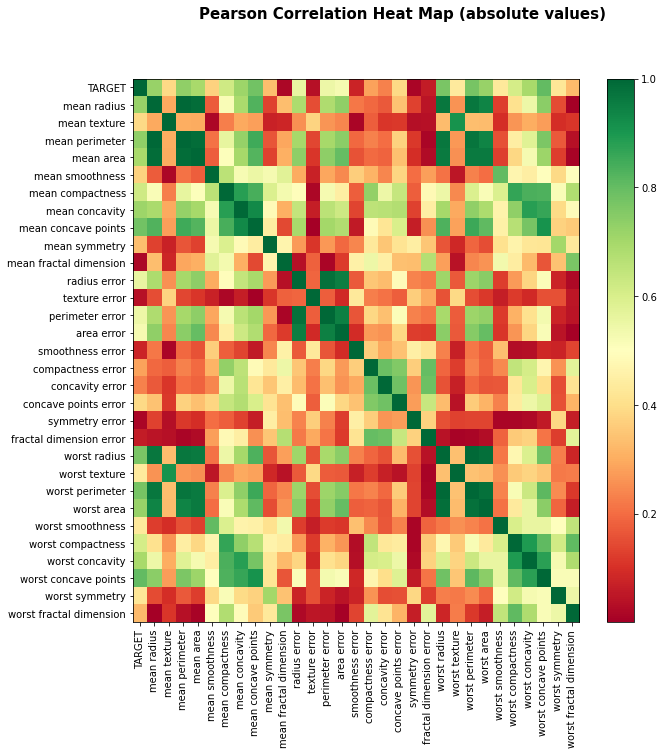

In [17]:
def correlation_matrix(y, X, is_plot=False):
    # Calculate and plot the correlation symmetrical matrix
    # Return:
    # yX - concatenated data
    # yX_corr - correlation matrix, pearson correlation of values from -1 to +1
    # yX_abs_corr - correlation matrix, absolute values

    yX = pd.concat([y, X], axis=1)
#     print(yX.columns)
    yX = yX.rename(columns={0: 'TARGET'})  # rename first column
#     print(yX.columns)
    print("Function correlation_matrix: X.shape, y.shape, yX.shape:", X.shape, y.shape, yX.shape)
    print()

    # Get feature correlations and transform to dataframe
    yX_corr = yX.corr(method='pearson')

    # Convert to abolute values
    yX_abs_corr = np.abs(yX_corr) 
    if is_plot:
        plt.figure(figsize=(10, 10))
        plt.imshow(yX_abs_corr, cmap='RdYlGn', interpolation='none', aspect='auto')
        plt.colorbar()
        plt.xticks(range(len(yX_abs_corr)), yX_abs_corr.columns, rotation='vertical')
        plt.yticks(range(len(yX_abs_corr)), yX_abs_corr.columns);
        plt.suptitle('Pearson Correlation Heat Map (absolute values)', fontsize=15, fontweight='bold')
        plt.show()

    return yX, yX_corr, yX_abs_corr

# Build the correlation matrix for the train data
yX, yX_corr, yX_abs_corr = correlation_matrix(y_train, X_train, is_plot=True)

## Feature reduction

In [19]:
CORRELATION_MIN = 0.1

# Sort features by their pearson correlation with the target value
s_corr_target = yX_abs_corr['TARGET']
s_corr_target_sort = s_corr_target.sort_values(ascending=False)

# Only use features with a minimum pearson correlation with the target of 0.1
s_low_correlation_ftrs = s_corr_target_sort[s_corr_target_sort <= CORRELATION_MIN]

# Print
print("Removed %d low correlation features:" % len(s_low_correlation_ftrs))
for i,v in enumerate(s_low_correlation_ftrs):
    print(i,np.round(v, DISPLAY_PRECISION), s_low_correlation_ftrs.index[i])

print("-"*50)

s_corr_target_sort = s_corr_target_sort[s_corr_target_sort > CORRELATION_MIN]

print("Remaining %d feature correlations:" % (len(s_corr_target_sort)-1))
for i,v in enumerate(s_corr_target_sort):
    ftr = s_corr_target_sort.index[i]
    if ftr == 'TARGET':
        continue
    
    print(i,np.round(v, DISPLAY_PRECISION), ftr)

Removed 5 low correlation features:
0 0.0778 smoothness error
1 0.0622 fractal dimension error
2 0.0373 texture error
3 0.0187 mean fractal dimension
4 0.0154 symmetry error
--------------------------------------------------
Remaining 25 feature correlations:
1 0.8024 worst concave points
2 0.7794 mean concave points
3 0.7723 worst perimeter
4 0.7661 worst radius
5 0.7318 mean perimeter
6 0.7194 worst area
7 0.719 mean radius
8 0.7111 mean concavity
9 0.6947 worst concavity
10 0.6932 mean area
11 0.6196 mean compactness
12 0.6062 worst compactness
13 0.5574 radius error
14 0.5465 perimeter error
15 0.5264 area error
16 0.4347 worst texture
17 0.4324 worst smoothness
18 0.4255 worst symmetry
19 0.3902 concave points error
20 0.3883 mean texture
21 0.373 mean smoothness
22 0.3361 mean symmetry
23 0.3272 worst fractal dimension
24 0.2823 compactness error
25 0.2322 concavity error


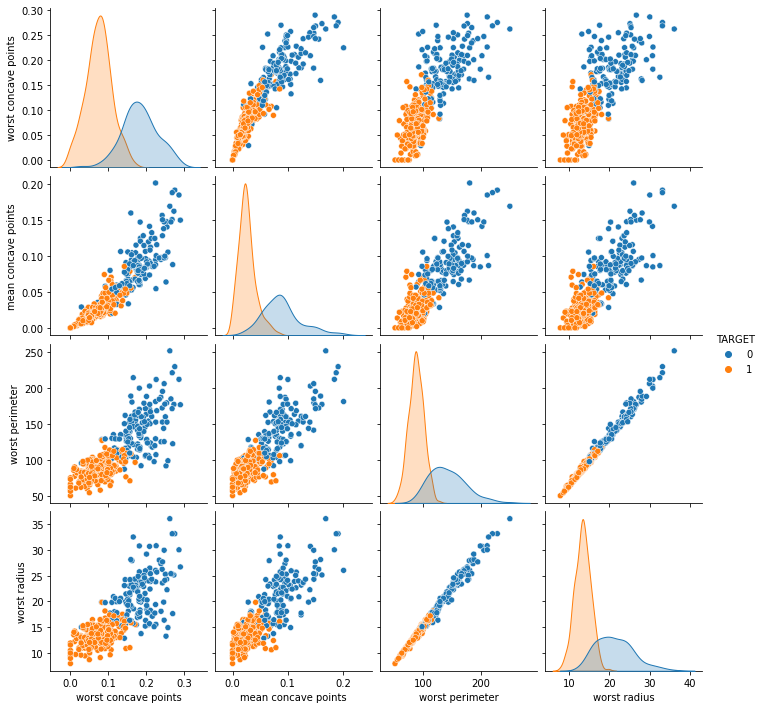

In [21]:
cols = ["TARGET", "worst concave points", "mean concave points", "worst perimeter", "worst radius"]

sns.pairplot(yX[cols], hue="TARGET")
plt.show()

# Model Implementation

In [22]:
#Important machine Learning models
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.naive_bayes import MultinomialNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import LinearSVC

from sklearn.ensemble import ExtraTreesClassifier

In [23]:
# check model accuracy, performance and validations
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

from sklearn.metrics import classification_report

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_validate, cross_val_score

from sklearn.svm import SVC

from sklearn import metrics

from sklearn.preprocessing import StandardScaler

#### Perform Feature Standard Scalling

In [24]:
# Scale the data to keep all the values in the same scale of 0 to 1 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Model Selection

In [27]:
print("Selecting Best Model")
models = [
    LogisticRegression(random_state=0,n_jobs=-1),
    DecisionTreeClassifier(criterion='entropy', random_state=0),
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0,n_jobs=-1),
    GaussianNB(),
    MultinomialNB(),
    KNeighborsClassifier(),
    LinearSVC(),
    ExtraTreesClassifier(n_estimators=100, random_state=0,n_jobs=-1)
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
model_names=[]
for model in tqdm(models):
    model_name = model.__class__.__name__
    model_names.append(model_name)
    accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

Selecting Best Model


 38%|███████████████████████████████▌                                                    | 3/8 [00:06<00:19,  3.84s/it]C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 690, in fit
    self._count(X, Y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py", lin

In [30]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
        ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
DecisionTreeClassifier,0.9171,0.0362
ExtraTreesClassifier,0.9649,0.0311
GaussianNB,0.9423,0.0258
KNeighborsClassifier,0.9523,0.0104
LinearSVC,0.9775,0.0311
LogisticRegression,0.9850,0.0205
MultinomialNB,NaN,NaN
RandomForestClassifier,0.9548,0.0243


In [31]:
print("Best Model Selected {}".format(acc['Mean Accuracy'].idxmax()))
model = models[model_names.index(acc['Mean Accuracy'].idxmax())]
# model = LogisticRegression(random_state=0,n_jobs=-1)
model.fit(X_train, y_train)
print("Predicting on Test data")
y_pred = model.predict(X_test)

Best Model Selected LogisticRegression
Predicting on Test data


In [32]:
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred, target_names= classes))

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

   malignant       0.94      0.97      0.95        63
      benign       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [33]:
print("Saving Model")
import pickle
pickle.dump(model, open("model.pkl", 'wb'))
print("Model Saved")

Saving Model
Model Saved
